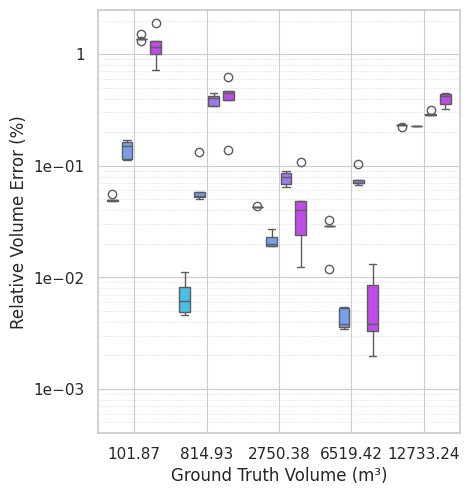

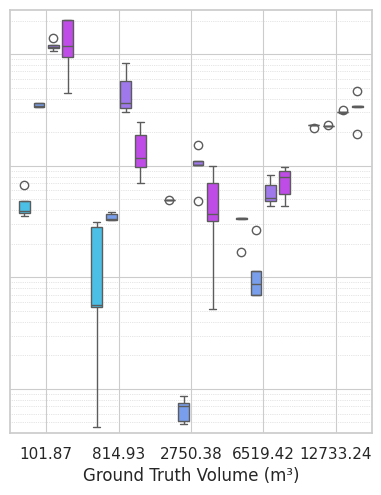

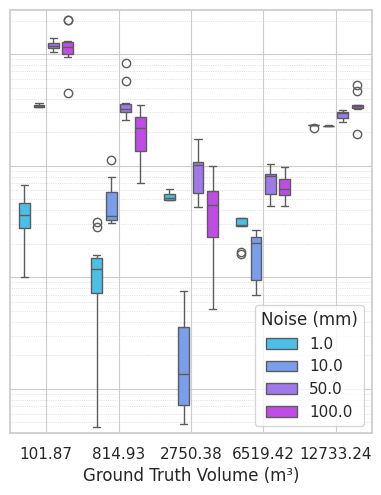

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline  # Ensure this is in your Python path
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator, LogFormatter

# Load the CSV file
results_df_list = [pd.read_csv("outputs/results_0_5_1.csv"), pd.read_csv("outputs/results_0_30_5.csv"), pd.read_csv("outputs/results_1_45_10.csv")]


# Define a helper function to compute the ground truth volume
def compute_gt_vol(row):
    sigma = row["radius"] / 2.0
    return pipeline.get_analytical_volume(sigma, row["radius"], row["max_depth"]).round(
        2
    )

for i, results_df in enumerate(results_df_list):

    results_df["gt_vol"] = results_df.apply(compute_gt_vol, axis=1)

    # Create a noise_std_mm column (noise in millimeters) and absolute accuracy, 2 digits
    results_df["noise_std_mm"] = results_df["noise_std"] * 1000
    results_df["volume_cut_acc_positive"] = results_df["volume_cut_acc"].abs()

    # Set the theme with a white grid and define an improved color palette.
    sns.set_theme(style="whitegrid")
    unique_noise = results_df["noise_std_mm"].unique()
    palette = sns.color_palette("cool", n_colors=len(unique_noise))

    plt.figure(figsize=(14/3, 5.5))
    ax = plt.gca()

    # Create a grouped boxplot with the improved palette
    sns.boxplot(
        x="gt_vol",
        y="volume_cut_acc_positive",
        hue="noise_std_mm",
        data=results_df,
        ax=ax,
        palette=palette,
        widths=0.15,
    )

    ax = plt.gca()
    ax.set_yscale("log")

    # Force a y-limit that covers at least two decades, so we can see more ticks
    ax.set_ylim(4e-4, 2.5)

    # Major ticks at powers of 10
    ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0,), numticks=10))
    ax.yaxis.set_major_formatter(LogFormatter())

    # Minor ticks at 2,3,4,5,6,7,8,9 times each power of 10
    ax.yaxis.set_minor_locator(
        LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=12)
    )
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    ax.grid(which="major", linewidth=0.8)
    ax.grid(which="minor", linestyle=":", linewidth=0.5)

    plt.xlabel("Ground Truth Volume (m³)")
    
    if i==0:
        plt.ylabel("Relative Volume Error (%)")
    else:
        plt.ylabel("")
        ax.tick_params(labelleft=False)
    
    l = plt.legend(title="Noise (mm)", loc="best")
    if i != len(results_df_list) - 1:
        l.remove()
    # plt.tight_layout()
    plt.savefig(f"final_{i}.png", dpi=300, bbox_inches="tight")
    plt.show()